In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'



To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:


In [7]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from matplotlib import pyplot as plt

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

engine.dispose()


data=pd.read_sql('select * from useducation',con=engine)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [4]:
data.isnull().sum()*100/data.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [6]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = data["STATE"].unique()

for state in states:
    data.loc[data["STATE"] == state, fill_list] = data.loc[data["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
data.dropna(inplace=True)

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Text(0.5, 1.0, 'total expenditure')

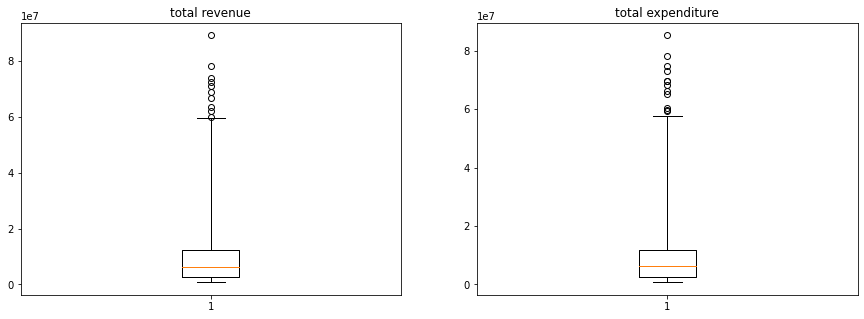

In [10]:
#using visualization techniques boxplot

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(data['TOTAL_REVENUE'],whis=5)
plt.title('total revenue')

plt.subplot(1,2,2)
plt.boxplot(data['TOTAL_EXPENDITURE'],whis=5)
plt.title('total expenditure')

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

In [11]:
#winsorization technique

from scipy.stats.mstats import winsorize

winsorized_revenue=winsorize(data['TOTAL_REVENUE'],(0,0.10))
winsorized_expenditure=winsorize(data['TOTAL_EXPENDITURE'],(0,0.10))



Text(0.5, 1.0, 'winsorized_expenditure')

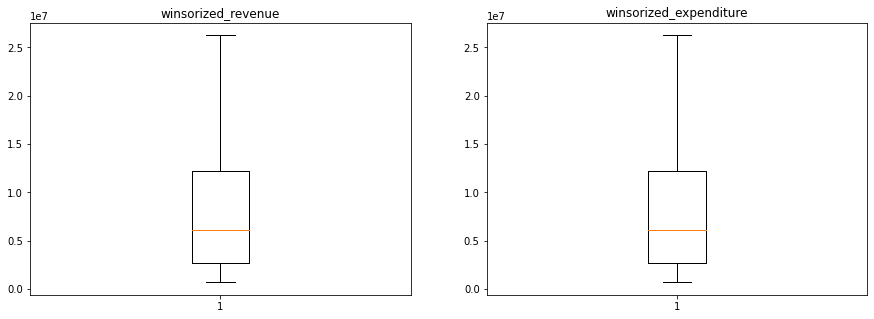

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue,whis=5)
plt.title('winsorized_revenue')

plt.subplot(1,2,2)
plt.boxplot(winsorized_revenue,whis=5)
plt.title('winsorized_expenditure')

Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

Text(0.5, 1.0, 'budget_deficit')

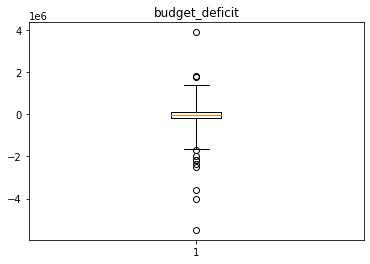

In [21]:
budget_deficit= data['TOTAL_REVENUE'] - data['TOTAL_EXPENDITURE']

#detecting outliers
plt.boxplot(budget_deficit,whis=5)
plt.title('budget_deficit')

Text(0.5, 1.0, 'winsorized_budget_deficit')

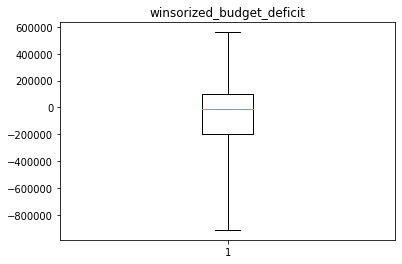

In [23]:
#using winsorization method to deal

winsorized_budget_deficit=winsorize(budget_deficit,(0.05,0.05))
plt.boxplot(winsorized_budget_deficit,whis=5)
plt.title('winsorized_budget_deficit')

Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

Text(0.5, 1.0, 'budget_deicit')

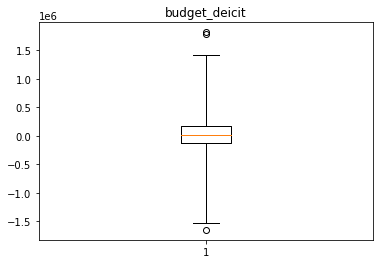

In [24]:
budget_deficit1=winsorized_revenue - winsorized_expenditure

plt.boxplot(budget_deficit1,whis=5)
plt.title('budget_deicit')

Text(0.5, 1.0, 'winsorized_budget_deficit1')

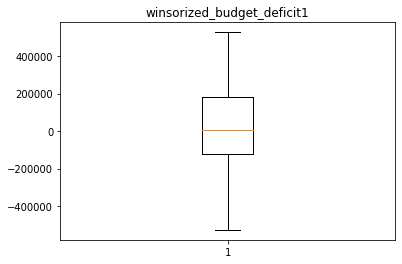

In [25]:
winsorized_budget_deficit1=winsorize(budget_deficit1,(0.05,0.05))
plt.boxplot(winsorized_budget_deficit1,whis=5)
plt.title('winsorized_budget_deficit1')

Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [26]:
pd.DataFrame({'original_budget_deficit':budget_deficit,'winsorized_budget_deficit1':winsorized_budget_deficit,'winsorized_budget_deficit2':winsorized_budget_deficit1}).describe()

,original_budget_deficit,winsorized_budget_deficit1,winsorized_budget_deficit2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-58733.012876,42601.083691
std,6.144222e+05,341300.816505,287393.469948
min,-5.487742e+06,-913765.000000,-526142.000000
25%,-1.965748e+05,-196574.750000,-123882.250000
50%,-8.872500e+03,-8872.500000,8133.500000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,560511.000000,526078.000000
